<a href="https://colab.research.google.com/github/khairihr/MachineLearning/blob/main/TaskWeek2/Regression_data_public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Khairi Hibatullah Ridho_1103228240_Tugas Regression Data Public
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


untuk dataset nya dari sini https://www.kaggle.com/datasets/bobnau/daily-website-visitors/data

In [5]:
#import berbagai library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
df = pd.read_csv('/content/drive/MyDrive/Dataset MachineLearning/daily-website-visitors.csv')

In [6]:
df.head() #melihat 5 data paling atas atau kepalanya

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [4]:
df.info() #melihat info dari data yang disajikan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [9]:
df['Date'] = pd.to_datetime(df['Date']) #konversi kolom 'Date' menjadi tipe datetime

In [20]:
X = df[['Day.Of.Week']] #memilih kolom day of week sebagai variabel x
y = df['Unique.Visits'] #memilih kolom unique visits sebagai variabel y

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #melakukan pemisahan data yang mau dilatih dan ditest

In [22]:
model = LinearRegression() #menggunakan model linear regression untuk memprediksi data waktu nya

model.fit(X_train, y_train) #melatih model dengan data pelatihan

y_pred = model.predict(X_test) #melakukan prediksi dengan data pengujian


In [23]:
#melakukan perhitungan mse dan mae dari data yang sudah diprediksi
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [24]:
#nenampilkan hasil analisis dari modelnya
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Mean Squared Error (MSE): 923218.40
Mean Absolute Error (MAE): 778.02


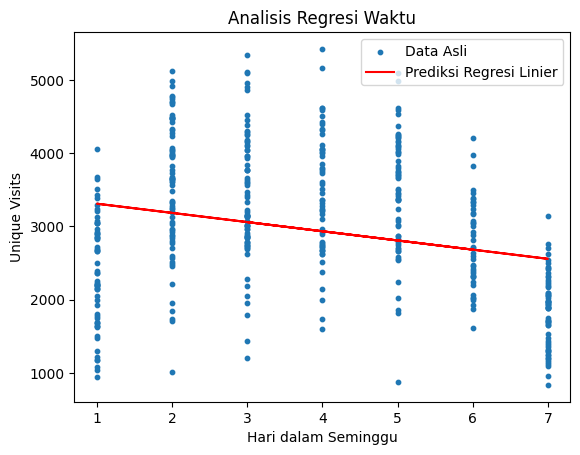

In [25]:
#visualisasi hasil prediksi yang didapatkan menggunakan scatterplot
plt.scatter(X_test, y_test, label='Data Asli', s=10)
plt.plot(X_test, y_pred, color='red', label='Prediksi Regresi Linier')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Unique Visits')
plt.legend()
plt.title('Analisis Regresi Waktu')
plt.show()

In [26]:
model.score(X_test, y_test)

0.05644287448124097

**INI YANG DIBAWAH NYOBA PAKAI CHATGPT SUPAYA SCORE NYA LEBIH BESAR, TAPI GRAFIKNYA JADI TERLIHAT ANEH/OVERFITTING**

Mean Squared Error (MSE): 643304.30
Mean Absolute Error (MAE): 648.70


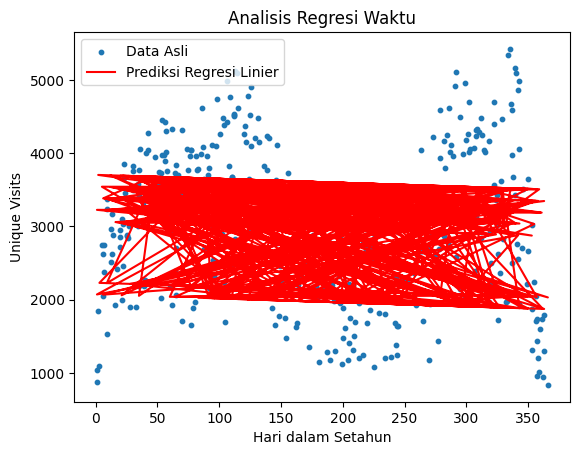

Skor Model: 0.34


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Membaca dataset
# Gantilah 'data.csv' dengan nama file dataset Anda
df = pd.read_csv('/content/drive/MyDrive/Dataset MachineLearning/daily-website-visitors.csv')

# Konversi kolom 'Date' menjadi tipe datetime
df['Date'] = pd.to_datetime(df['Date'])

# Pra-pemrosesan kolom 'Unique.Visits' untuk menghilangkan tanda koma dan mengonversinya ke dalam float
df['Unique.Visits'] = df['Unique.Visits'].str.replace(',', '').astype(float)

# Menambahkan fitur 'Day.Of.Week' sebagai hari dalam seminggu
df['Day.Of.Week'] = df['Date'].dt.dayofweek

# Menambahkan fitur 'Is_Weekend' yang menunjukkan apakah hari adalah akhir pekan atau bukan
df['Is_Weekend'] = df['Day.Of.Week'].apply(lambda x: 1 if x >= 5 else 0)

# Menambahkan fitur 'Day_Of_Year' (hari dalam setahun)
df['Day_Of_Year'] = df['Date'].dt.dayofyear

# Memilih kolom yang akan digunakan dalam analisis
X = df[['Day.Of.Week', 'Is_Weekend', 'Day_Of_Year']]
y = df['Unique.Visits']

# Pembagian data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linier
model = LinearRegression()

# Melatih model dengan data pelatihan
model.fit(X_train, y_train)

# Melakukan prediksi dengan data pengujian
y_pred = model.predict(X_test)

# Menghitung metrik kinerja model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Menampilkan hasil analisis
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Visualisasi hasil prediksi
plt.scatter(X_test['Day_Of_Year'], y_test, label='Data Asli', s=10)
plt.plot(X_test['Day_Of_Year'], y_pred, color='red', label='Prediksi Regresi Linier')
plt.xlabel('Hari dalam Setahun')
plt.ylabel('Unique Visits')
plt.legend()
plt.title('Analisis Regresi Waktu')
plt.show()

# Skor model
score = model.score(X_test, y_test)
print(f'Skor Model: {score:.2f}')
